In [1]:
# !pip install -qU "langchain[openai]"

In [2]:
import os
import getpass

# Load environment variables from .env file
from dotenv import load_dotenv
load_dotenv()

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"var: ")

_set_env("OPENAI_API_KEY")
_set_env("TAVILY_API_KEY")

In [3]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")

llm.invoke("HI!")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 9, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_51db84afab', 'id': 'chatcmpl-CO0DS6s9cguja2FkPX1788DYiPFrw', 'finish_reason': 'stop', 'logprobs': None}, id='run-f09b54ba-a0fb-44f3-9bff-37ee7dd6b4f7-0', usage_metadata={'input_tokens': 9, 'output_tokens': 9, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [4]:
from langchain.chat_models import init_chat_model

model = init_chat_model(
    "gpt-4o-mini", 
    model_provider="openai")

model.invoke("Hi what is your model name?")

AIMessage(content="I am based on OpenAI's GPT-3 model. If you have any questions or need assistance, feel free to ask!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 14, 'total_tokens': 40, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CO0DS3OVoBV3l0MD91L1OakxqdqWL', 'finish_reason': 'stop', 'logprobs': None}, id='run-33ace397-d72f-43d4-8f94-3ee9d7125654-0', usage_metadata={'input_tokens': 14, 'output_tokens': 26, 'total_tokens': 40, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [5]:
model = init_chat_model("claude-sonnet-4-5", model_provider="anthropic")

model.invoke("Hi what is your name? Like the model name?")

AIMessage(content="I'm an AI assistant called Claude, created by Anthropic. I don't know all the details about my model name or training though.", additional_kwargs={}, response_metadata={'id': 'msg_01Dj8xWDumiiMQicX4r8PQYJ', 'model': 'claude-sonnet-4-5', 'stop_reason': 'end_turn', 'stop_sequence': None, 'usage': {'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 18, 'output_tokens': 32, 'cache_creation': {'ephemeral_5m_input_tokens': 0, 'ephemeral_1h_input_tokens': 0}, 'service_tier': 'standard'}, 'model_name': 'claude-sonnet-4-5'}, id='run-a8118e78-4fd2-4c11-85ec-4b67d0d61e29-0', usage_metadata={'input_tokens': 18, 'output_tokens': 32, 'total_tokens': 50, 'input_token_details': {'cache_read': 0, 'cache_creation': 0}})

# Full LLM App in LangChain

In [6]:
import getpass
import os

try:
    # load environment variables from .env file (requires `python-dotenv`)
    from dotenv import load_dotenv

    load_dotenv()
except ImportError:
    pass

os.environ["LANGSMITH_TRACING"] = "true"
if "LANGSMITH_API_KEY" not in os.environ:
    os.environ["LANGSMITH_API_KEY"] = getpass.getpass(
        prompt="Enter your LangSmith API key (optional): "
    )
if "LANGSMITH_PROJECT" not in os.environ:
    os.environ["LANGSMITH_PROJECT"] = getpass.getpass(
        prompt='Enter your LangSmith Project Name (default = "default"): '
    )
    if not os.environ.get("LANGSMITH_PROJECT"):
        os.environ["LANGSMITH_PROJECT"] = "default"
if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass.getpass(
        prompt="Enter your OpenAI API key (required if using OpenAI): "
    )

In [7]:
from langchain.chat_models import init_chat_model

model = init_chat_model(
    "gpt-4o-mini",
    model_provider="openai"
)

model.invoke("Hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CO0DnJEeU14Ljx0y1PxGB1YSHx9tS', 'finish_reason': 'stop', 'logprobs': None}, id='run-bf283bb9-dd9f-4820-bfdc-ed0f2ac4ad0c-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [8]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage("Translate the following from English into Italian"),
    HumanMessage("Hi! Let's learn about large language models!"),
]

model.invoke(messages)

AIMessage(content='Ciao! Impariamo sui modelli di linguaggio di grandi dimensioni!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 27, 'total_tokens': 44, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_51db84afab', 'id': 'chatcmpl-CO0DnRjaWQlyxGDoJJ1pDHXbcCFr8', 'finish_reason': 'stop', 'logprobs': None}, id='run-3c84fcd9-da12-4440-990b-31a271404e0e-0', usage_metadata={'input_tokens': 27, 'output_tokens': 17, 'total_tokens': 44, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [9]:
model.invoke([{"role": "user", "content": "How are ya?"}])

AIMessage(content="I'm just a program, so I don't have feelings, but I'm here and ready to help you! How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 11, 'total_tokens': 38, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CO0DoOJkCOTHdEfemUE9qGNVG1YEi', 'finish_reason': 'stop', 'logprobs': None}, id='run-6b834ecc-a4d8-4330-914b-d67ce9c9f6f2-0', usage_metadata={'input_tokens': 11, 'output_tokens': 27, 'total_tokens': 38, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [10]:
for token in model.stream("Tell me the 3 funniest jokes you know"):
    print(token.content, end="|")

|Sure|!| Here| are| three| jokes| that| might| give| you| a| laugh|:

|1|.| **|Why| don't| scientists| trust| atoms|?|**|  
|  | Because| they| make| up| everything|!

|2|.| **|I| told| my| wife| she| was| drawing| her| eyebrows| too| high|.|**|  
|  | She| looked| surprised|.

|3|.| **|Why| did| the| scare|crow| win| an| award|?|**|  
|  | Because| he| was| outstanding| in| his| field|!

|I| hope| these| brought| a| smile| to| your| face|!||

In [11]:
from langchain_core.prompts import ChatPromptTemplate

system_template = "Translate the following from {language_source} into {language_target}"

prompt_template = ChatPromptTemplate.from_messages(
    [("system", system_template), ("human", "{input_sentence}")]
)

prompt_template.format(language_source="English", language_target="French", input_sentence="I love programming in Python")

'System: Translate the following from English into French\nHuman: I love programming in Python'

In [12]:
prompt = prompt_template.invoke({"language_source": "English", "language_target": "French", "input_sentence": "I love programming in Python"})
response = model.invoke(prompt)
response

AIMessage(content="J'aime programmer en Python.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 6, 'prompt_tokens': 23, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_51db84afab', 'id': 'chatcmpl-CO0DsYhsK3pjsd9BwSpnEFZmPSuEk', 'finish_reason': 'stop', 'logprobs': None}, id='run-f678d2e3-3101-4bbb-8781-b251c5fa9cec-0', usage_metadata={'input_tokens': 23, 'output_tokens': 6, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [13]:
response.content

"J'aime programmer en Python."

In [14]:
chain = prompt_template | model

response = chain.invoke({"language_source": "English", "language_target": "Italian", "input_sentence": "Lucas is a gorgeous bald teacher."})

In [15]:
response.content

'Lucas è un bellissimo insegnante calvo.'

# Structured Outputs

In [16]:
from pydantic import BaseModel, Field
from openai import OpenAI

class ElementsOfLiveCourse(BaseModel):
    title: str = Field(description="The title of the live course")
    topic: str = Field(description="The core topic of the live course")
    example_lesson: str = Field(description="An example lesson from the live course")

with open("./mcp_course_example.txt", "r") as f:
    prompt_raw_course = f.read()

client = OpenAI()

response = client.beta.chat.completions.parse(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You take in raw information for a course and\
            you output the structured objects with information about that course"},
        {"role": "user", "content": prompt_raw_course}
    ],
    response_format=ElementsOfLiveCourse
)

response

ParsedChatCompletion[ElementsOfLiveCourse](id='chatcmpl-CO0DtFkCXNOQpIGfUsEOEGVdcfnXb', choices=[ParsedChoice[ElementsOfLiveCourse](finish_reason='stop', index=0, logprobs=None, message=ParsedChatCompletionMessage[ElementsOfLiveCourse](content='{"title":"Model Context Protocol Development","topic":"AI Integration and Development","example_lesson":"Building Your First MCP Server: A Step-by-Step Guide"}', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None, parsed=ElementsOfLiveCourse(title='Model Context Protocol Development', topic='AI Integration and Development', example_lesson='Building Your First MCP Server: A Step-by-Step Guide')))], created=1759836765, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier='default', system_fingerprint='fp_560af6e559', usage=CompletionUsage(completion_tokens=31, prompt_tokens=1125, total_tokens=1156, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_to

In [17]:
response.choices[0].message.parsed

ElementsOfLiveCourse(title='Model Context Protocol Development', topic='AI Integration and Development', example_lesson='Building Your First MCP Server: A Step-by-Step Guide')

In [18]:
from IPython.display import Markdown

str_output = f"""
# {response.choices[0].message.parsed.title}

- *Topic*: {response.choices[0].message.parsed.topic}
- *Example Lesson*: {response.choices[0].message.parsed.example_lesson}
"""
Markdown(str_output)


# Model Context Protocol Development

- *Topic*: AI Integration and Development
- *Example Lesson*: Building Your First MCP Server: A Step-by-Step Guide


In [19]:
llm = init_chat_model("gpt-4o-mini", model_provider="openai")

llm.invoke("What are the elements of a Screenplay?")

AIMessage(content="A screenplay is a structured format that outlines the narrative for a film or television show. The elements include:\n\n1. **Title Page**: Contains the title of the screenplay, the writer’s name, and contact information, often with the date.\n\n2. **Logline**: A brief summary (1-2 sentences) that captures the essence of the story, including the protagonist, their goal, and the primary conflict.\n\n3. **Synopsis**: A brief overview (usually a paragraph or two) of the entire story, including the main characters, setting, and plot.\n\n4. **Characters**: \n   - **Protagonist**: The main character who drives the story.\n   - **Antagonist**: The character or force in opposition to the protagonist.\n   - Supporting characters: Other relevant characters that contribute to the plot and development of the protagonist.\n\n5. **Scenes**: Each scene begins on a new line, with a scene heading (slug line) indicating whether it is interior (INT.) or exterior (EXT.), the location, an

## Pydantic Class

In [20]:
from typing import Optional
from pydantic import BaseModel, Field


# Pydantic
class ElementsOfScreenplay(BaseModel):
    """Elements of a Screenplay."""
    
    title: str = Field(description="The title of the screenplay")
    genre: str = Field(description="The genre of the screenplay")
    protagonist: str = Field(description="The protagonist of the screenplay")
    antagonist: str = Field(description="The antagonist of the screenplay")
    setting: str = Field(description="The setting of the screenplay")
    plot: str = Field(description="The plot of the screenplay")


structured_llm = llm.with_structured_output(ElementsOfScreenplay)

screenplay_structured = structured_llm.invoke("Structure a Screenplay about characters afraid of becoming outdated.")

In [21]:
from IPython.display import Markdown

str_output = f"""
# {screenplay_structured.title}

- *Genre*: {screenplay_structured.genre}
- *Protagonist*: {screenplay_structured.protagonist}
- *Antagonist*
- *Setting*: {screenplay_structured.setting}

### Plot

{screenplay_structured.plot}
"""
Markdown(str_output)


# Outdated

- *Genre*: Drama/Comedy
- *Protagonist*: Max, a once-popular social media influencer
- *Antagonist*
- *Setting*: A mid-sized city in the near future, heavily influenced by technology and changing social norms

### Plot

Max, a former social media influencer struggling to maintain relevance in a rapidly changing digital landscape, teams up with his old friends, a group of quirky tech misfits, to create an innovative app that they believe will restore his fame. However, as they dive deeper into the project, they face challenges from younger competitors, self-doubt, and the realization that perhaps their value is not based solely on their online presence. Ultimately, they must confront the fear of becoming outdated and learn to embrace the inevitable changes of life, finding meaning beyond social validation.


# Model + Tools

In [22]:
from langchain_community.tools.tavily_search import TavilySearchResults

model = init_chat_model("gpt-4o-mini", model_provider="openai")
search = TavilySearchResults(max_results=2)
tools = [search]

model_with_tools = model.bind_tools(tools)

output_model_tools = model_with_tools.invoke("Who is in the NBA playoffs?")

In [23]:
output_model_tools.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'NBA playoffs 2024 current teams'},
  'id': 'call_L6yJxQAY8ww4PueY8mxZmoja',
  'type': 'tool_call'}]

The output we get here is something called a "tool call" which means, prepared arguments for a pre-defined function (in this case
web search with the tavily API) to gather the required information.

Now let's look at a full agent.

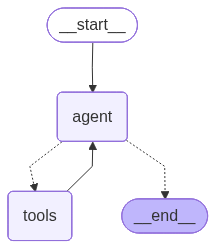

In [24]:
# Import relevant functionality
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent

# Create the agent
memory = MemorySaver()
model = init_chat_model("gpt-4o-mini", model_provider="openai")
search = TavilySearchResults(max_results=2)
tools = [search]
agent_executor = create_react_agent(model, tools, checkpointer=memory)

agent_executor

Agent Executor is a graph!

In [25]:
# We pass config because this agent has memory so we need to pass a thread_id
config = {"configurable": {"thread_id": "abc123"}}
# Below we can't just invoke on "input" we use "messages" because the agent expects a list of messages (this info is hidden in the create_react_agent function)
agent_executor.invoke({"messages": [HumanMessage("What is the capital of Brazil?")]}, config=config)

{'messages': [HumanMessage(content='What is the capital of Brazil?', additional_kwargs={}, response_metadata={}, id='0bc1464f-6e7c-4575-91bb-8df38e4b702e'),
  AIMessage(content='The capital of Brazil is Brasília.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 86, 'total_tokens': 94, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CO0EIGtAwbj73pWwwjrw1vy7F2eFb', 'finish_reason': 'stop', 'logprobs': None}, id='run-00632bf4-f027-4121-a74c-08f1fddb7a56-0', usage_metadata={'input_tokens': 86, 'output_tokens': 8, 'total_tokens': 94, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [26]:
for step in agent_executor.stream(
    {"messages": [HumanMessage(content="What are the best NBA teams right now?")]},
    stream_mode="values",
    config=config
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

What are the best NBA teams right now?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_hCGAN1pAwPAkYSZohfIQ5926)
 Call ID: call_hCGAN1pAwPAkYSZohfIQ5926
  Args:
    query: best NBA teams 2023
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "2023-24 NBA Team Ratings", "url": "https://www.basketball-reference.com/leagues/NBA_2024_ratings.html", "content": "|  | | | | | | | Unadjusted | | | | Adjusted | | | |\n| Rk | Team | Conf | Div | W | L | W/L% | MOV | ORtg | DRtg | NRtg | MOV/A | ORtg/A | DRtg/A | NRtg/A |\n| 1 | Boston Celtics | E | A | 64 | 18 | .780 | 11.34 | 124.23 | 112.51 | 11.71 | 10.74 | 123.81 | 112.70 | 11.11 |\n| 2 | Oklahoma City Thunder | W | NW | 57 | 25 | .695 | 7.41 | 120.43 | 113.12 | 7.31 | 7.36 | 120.49 | 113.23 | 7.26 | [...] |

In [28]:
# !pip install langchain-ollama

from langchain.chat_models import init_chat_model

# NOTE: Make sure to download this model first with: ollama pull mistral-small3.2
local_llm = init_chat_model("mistral-small3.2", model_provider="ollama")

local_llm.invoke("What is the team from NBA most likely to win the championship this year?")

AIMessage(content="To provide an accurate prediction for the most likely NBA team to win the championship this year, I would need to check the latest standings, team performances, and expert analyses. Since my knowledge cutoff is in October 2023, I don't have real-time data or updates on the current season.\n\nWould you like me to help you find the latest information or standings from a reliable source? If so, you can provide the current date or the specific season you're interested in, and I can guide you on where to look for the most up-to-date information.", additional_kwargs={}, response_metadata={'model': 'mistral-small3.2', 'created_at': '2025-10-07T11:33:44.161276Z', 'done': True, 'done_reason': 'stop', 'total_duration': 12411123833, 'load_duration': 3727225958, 'prompt_eval_count': 522, 'prompt_eval_duration': 3658988667, 'eval_count': 115, 'eval_duration': 5007481500, 'model_name': 'mistral-small3.2'}, id='run-17bca241-4a39-450a-af4b-c49fdd4249c2-0', usage_metadata={'input_tok

In [ ]:
search = TavilySearchResults(max_results=2)
tools = [search]
agent_executor = create_react_agent(local_llm, tools)

In [30]:
agent_executor.invoke({"messages": [HumanMessage("What is the team from NBA most likely to win the championship this year?")]})

{'messages': [HumanMessage(content='What is the team from NBA most likely to win the championship this year?', additional_kwargs={}, response_metadata={}, id='5bc5ecb1-f853-4636-a26d-afffe7e53ab8'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'mistral-small3.2', 'created_at': '2025-10-07T11:33:49.985759Z', 'done': True, 'done_reason': 'stop', 'total_duration': 2231277750, 'load_duration': 68959583, 'prompt_eval_count': 607, 'prompt_eval_duration': 1155921875, 'eval_count': 24, 'eval_duration': 1004482958, 'model_name': 'mistral-small3.2'}, id='run-6da4258e-ba2f-486e-abb2-3dc8a5212e10-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'NBA team most likely to win the championship this year'}, 'id': 'eb997b21-b76c-4bb2-bb32-8f5bb986de8f', 'type': 'tool_call'}], usage_metadata={'input_tokens': 607, 'output_tokens': 24, 'total_tokens': 631}),
  ToolMessage(content='[{"title": "NBA Championship Odds for Every Team Ahead of 2025-26 NBA ..."